In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('data/Europe_GDP.csv')

In [3]:
df.head()

,Year,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,Italy,Luxembourg,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
0,1960,6.650134e+09,1.181062e+10,6.361166e+09,5.279011e+09,6.222548e+10,8.431095e+10,4.335192e+09,252169712.0,1.998550e+09,4.191581e+10,709941874.0,1.326346e+10,5.197399e+09,3.339150e+09,1.243339e+10,1.595320e+10,1.041223e+10,7.323397e+10
1,1961,7.375455e+09,1.256170e+10,7.058361e+09,5.983900e+09,6.746164e+10,9.620573e+10,4.961399e+09,257703244.6,2.151773e+09,4.654222e+10,710163719.4,1.457838e+10,5.669689e+09,3.573719e+09,1.424830e+10,1.735478e+10,1.171335e+10,7.774197e+10
2,1962,7.823687e+09,1.343683e+10,7.953274e+09,6.407225e+09,7.560753e+10,1.055090e+11,5.213043e+09,289200704.4,2.329373e+09,5.229335e+10,747846862.2,1.582429e+10,6.107077e+09,3.835884e+09,1.662150e+10,1.882135e+10,1.298965e+10,8.124756e+10
3,1963,8.447137e+09,1.444581e+10,8.466045e+09,6.958296e+09,8.475920e+10,1.118230e+11,5.895281e+09,345175036.1,2.505073e+09,5.989787e+10,797902154.2,1.716848e+10,6.553270e+09,4.084252e+09,1.964575e+10,2.037167e+10,1.428387e+10,8.656196e+10
4,1964,9.249879e+09,1.616804e+10,9.677401e+09,7.848288e+09,9.400785e+10,1.228800e+11,6.669670e+09,440797869.3,2.851092e+09,6.556965e+10,910877686.3,2.020232e+10,7.206522e+09,4.429203e+09,2.198258e+10,2.271843e+10,1.583313e+10,9.440756e+10


In [4]:
df.shape

(64, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            64 non-null     int64  
 1   Austria         64 non-null     float64
 2   Belgium         64 non-null     float64
 3   Denmark         64 non-null     float64
 4   Finland         64 non-null     float64
 5   France          64 non-null     float64
 6   Germany         64 non-null     float64
 7   Greece          64 non-null     float64
 8   Iceland         64 non-null     float64
 9   Ireland         64 non-null     float64
 10  Italy           64 non-null     float64
 11  Luxembourg      64 non-null     float64
 12  Netherlands     64 non-null     float64
 13  Norway          64 non-null     float64
 14  Portugal        64 non-null     float64
 15  Spain           64 non-null     float64
 16  Sweden          64 non-null     float64
 17  Switzerland     64 non-null     float

In [6]:
df.isna().sum()

Year              0
Austria           0
Belgium           0
Denmark           0
Finland           0
France            0
Germany           0
Greece            0
Iceland           0
Ireland           0
Italy             0
Luxembourg        0
Netherlands       0
Norway            0
Portugal          0
Spain             0
Sweden            0
Switzerland       0
United Kingdom    0
dtype: int64

In [7]:
df.columns.to_list()

['Year',
 'Austria',
 'Belgium',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Italy',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom']

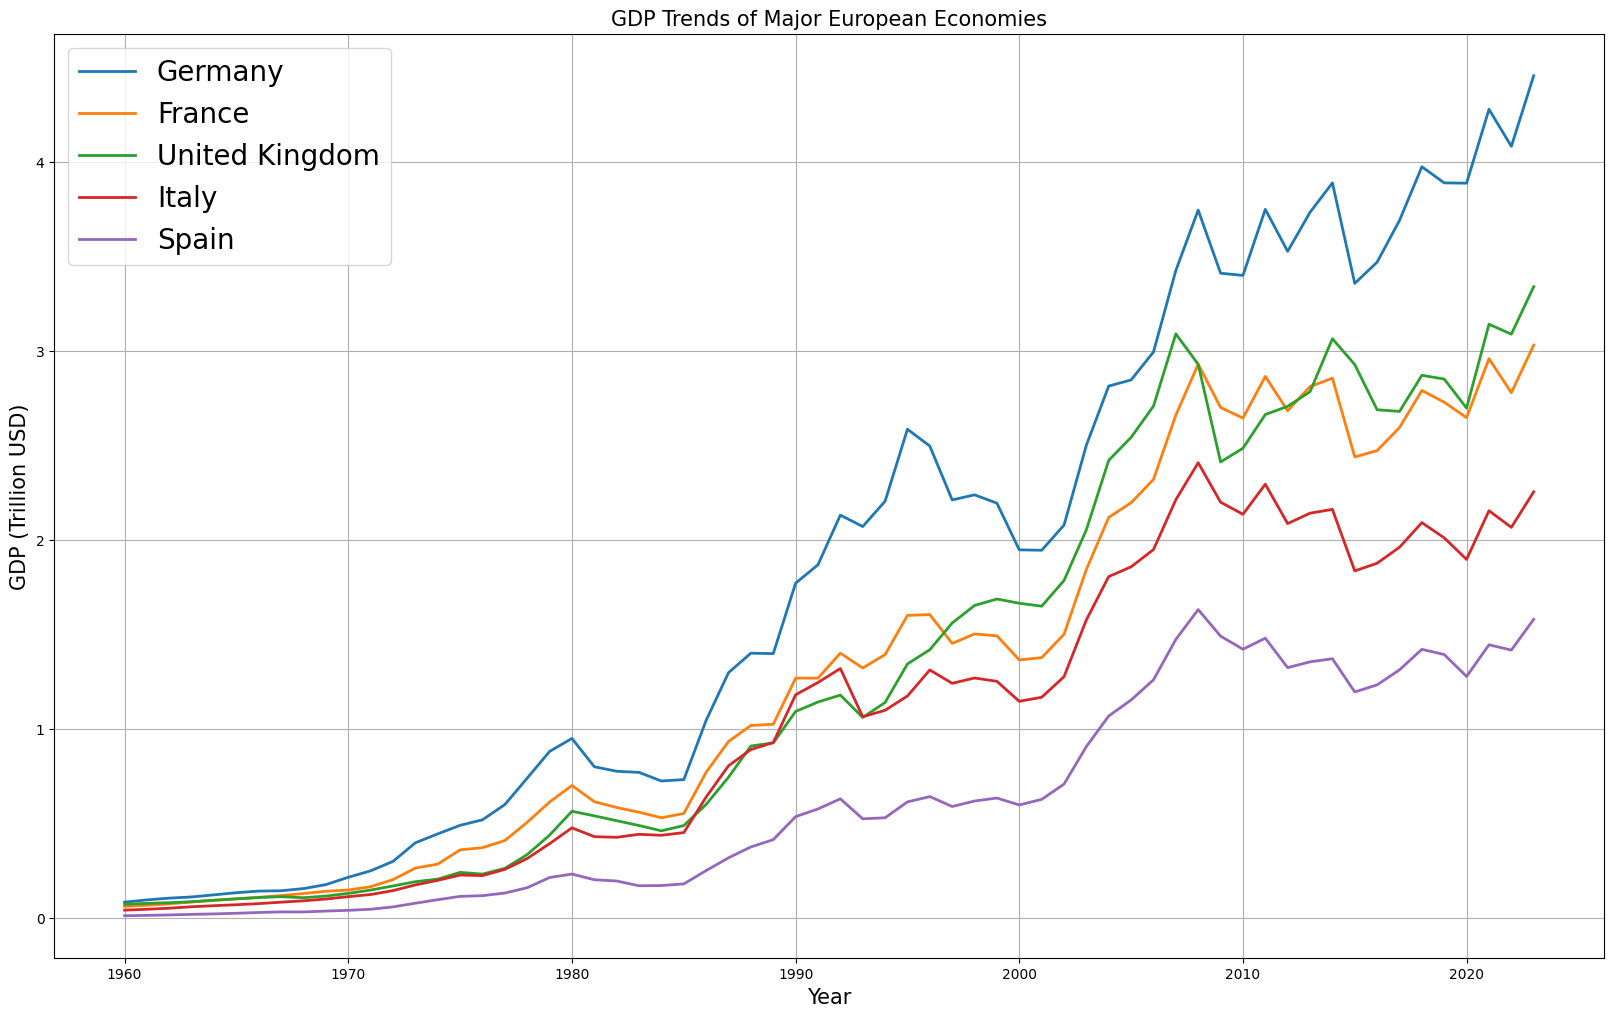

In [8]:
# Convert Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Select major economies for clarity
major_economies = ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain']

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 12))

for country in major_economies:
    plt.plot(df['Year'], df[country]/1e12, label=country, linewidth=2)
plt.title('GDP Trends of Major European Economies', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('GDP (Trillion USD)', fontsize=15)
plt.legend(fontsize=20)
plt.grid(True)

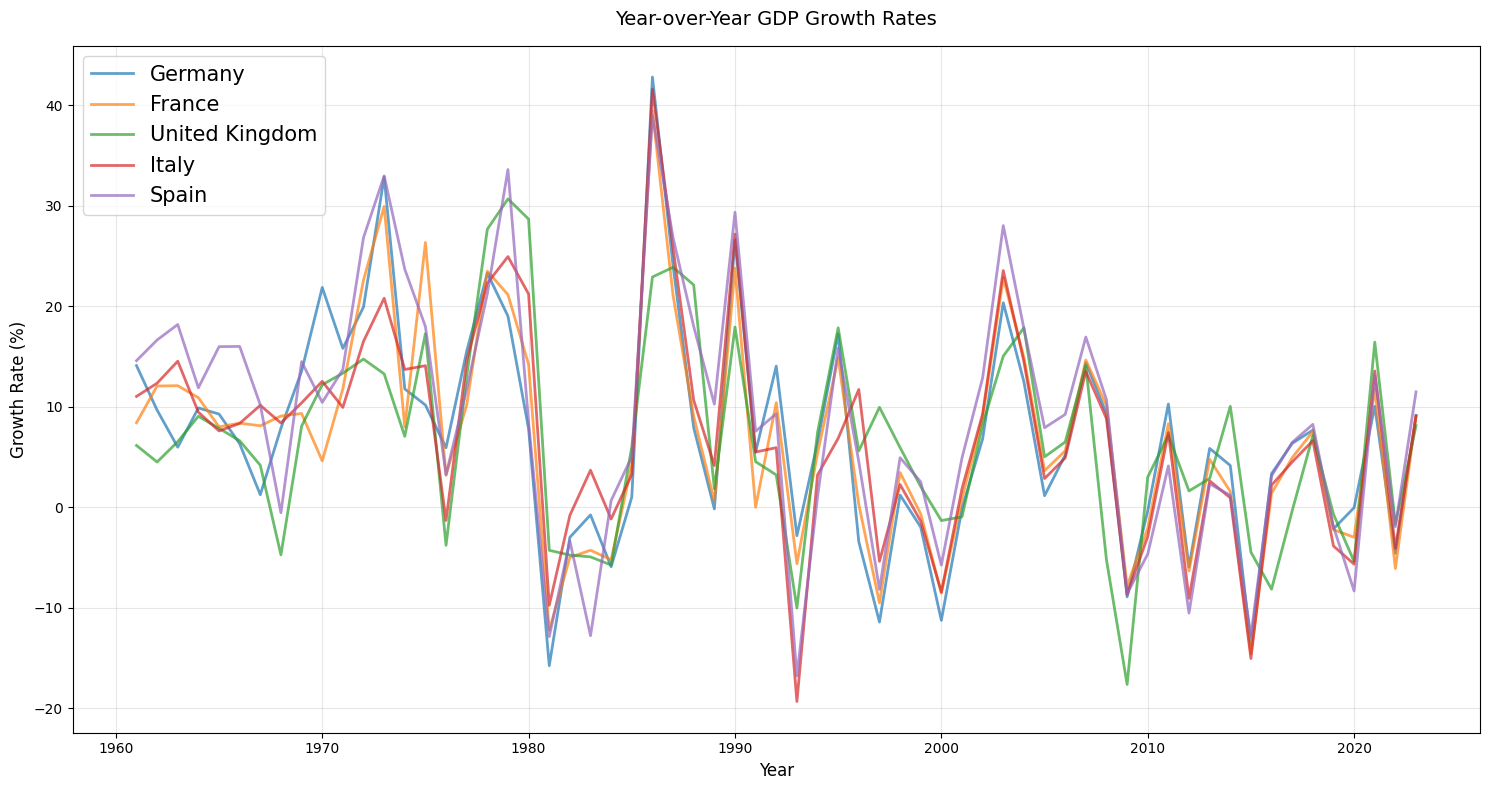

In [9]:
# Let's plot Year-over-Year GDP
plt.figure(figsize=(15, 8))

# Create the plot
for country in major_economies:
    growth = df[country].pct_change() * 100
    plt.plot(df['Year'], growth, label=country, alpha=0.7, linewidth=2)

# Customize the plot
plt.title('Year-over-Year GDP Growth Rates', fontsize=14, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.legend(fontsize=15, loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

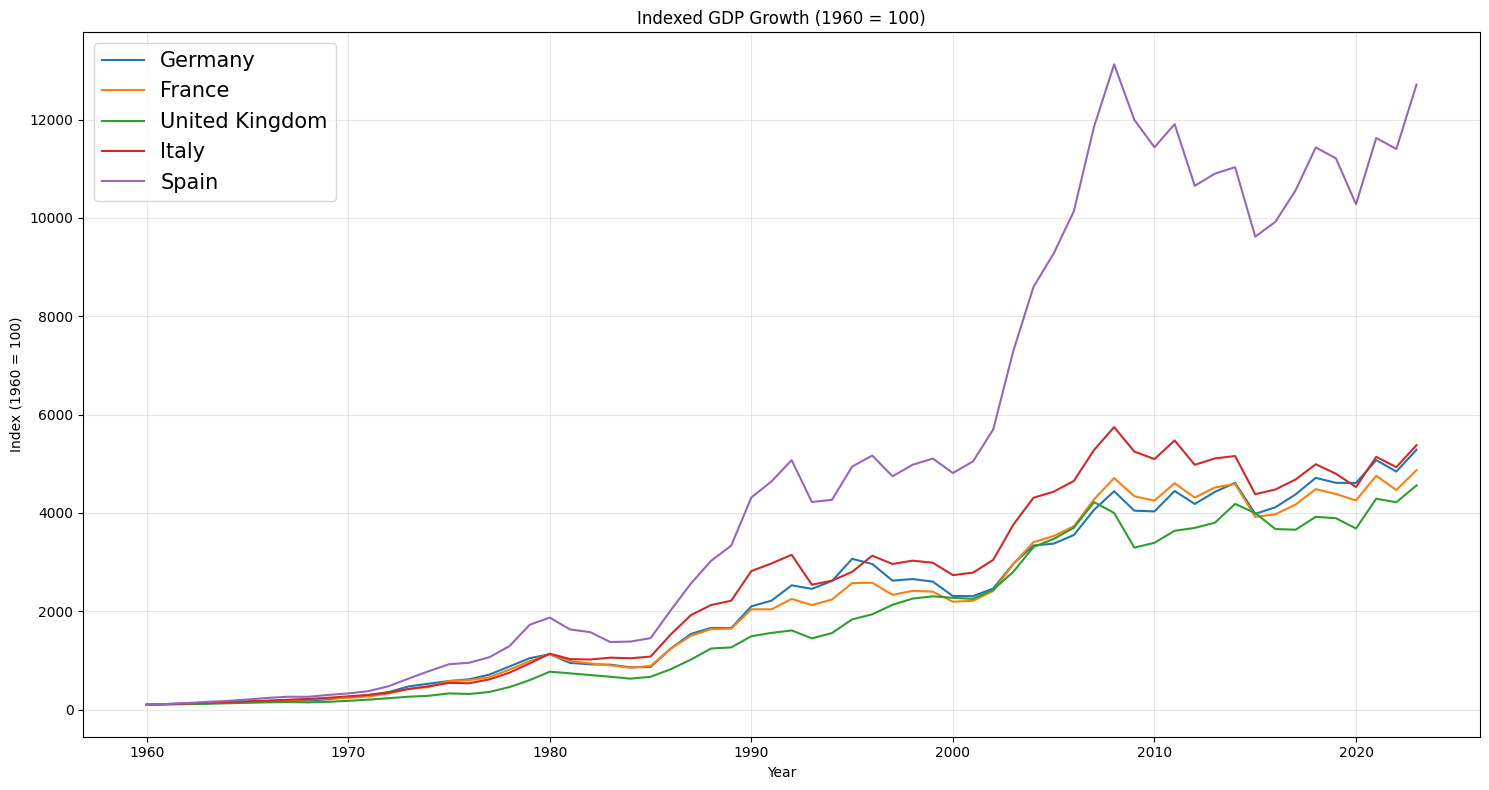

In [10]:
plt.figure(figsize=(15, 8))

# Create the plot
for country in major_economies:
    indexed = (df[country] / df[country].iloc[0]) * 100
    plt.plot(df['Year'], indexed, label=country)

# Customize the plot
plt.title('Indexed GDP Growth (1960 = 100)', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Index (1960 = 100)')
plt.legend(fontsize=15, loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Calculate summary statistics for major economies
summary_stats = pd.DataFrame()
for country in major_economies:
    stats = {
        'Mean GDP (Billion USD)': df[country].mean() / 1e9,
        'Current GDP (Billion USD)': df[country].iloc[-1] / 1e9,
        'Total Growth (%)': ((df[country].iloc[-1] / df[country].iloc[0]) - 1) * 100,
        'Avg Annual Growth (%)': (pow(df[country].iloc[-1] / df[country].iloc[0], 1/len(df)) - 1) * 100,
        'Volatility (Std Dev of Growth)': df[country].pct_change().std() * 100
    }
    summary_stats[country] = pd.Series(stats)

print("\nSummary Statistics for Major Economies:")
print(summary_stats.round(2))


Summary Statistics for Major Economies:
                                Germany   France  United Kingdom    Italy  \
Mean GDP (Billion USD)          1857.70  1332.03         1345.39  1055.38   
Current GDP (Billion USD)       4456.08  3030.90         3340.03  2254.85   
Total Growth (%)                5185.29  4770.83         4460.77  5279.47   
Avg Annual Growth (%)              6.40     6.26            6.15     6.42   
Volatility (Std Dev of Growth)    10.94    10.58            9.82    10.72   

                                   Spain  
Mean GDP (Billion USD)            623.17  
Current GDP (Billion USD)        1580.69  
Total Growth (%)                12613.26  
Avg Annual Growth (%)               7.86  
Volatility (Std Dev of Growth)     12.25  


In [12]:
# Identify major economic events
print("\nMajor Economic Events Analysis:")
for country in major_economies:
    # Find years with significant GDP drops (more than 2%)
    significant_drops = df[df[country].pct_change() < -0.02]
    if len(significant_drops) > 0:
        print(f"\n{country} experienced significant GDP drops in:")
        for year in significant_drops['Year'].dt.year:
            print(f"- {year}")


Major Economic Events Analysis:

Germany experienced significant GDP drops in:
- 1981
- 1982
- 1984
- 1993
- 1996
- 1997
- 2000
- 2009
- 2012
- 2015
- 2019
- 2022

France experienced significant GDP drops in:
- 1981
- 1982
- 1983
- 1984
- 1993
- 1997
- 2000
- 2009
- 2010
- 2012
- 2015
- 2019
- 2020
- 2022

United Kingdom experienced significant GDP drops in:
- 1968
- 1976
- 1981
- 1982
- 1983
- 1984
- 1993
- 2008
- 2009
- 2015
- 2016
- 2020

Italy experienced significant GDP drops in:
- 1981
- 1993
- 1997
- 2000
- 2009
- 2010
- 2012
- 2015
- 2019
- 2020
- 2022

Spain experienced significant GDP drops in:
- 1981
- 1982
- 1983
- 1993
- 1997
- 2000
- 2009
- 2010
- 2012
- 2015
- 2020


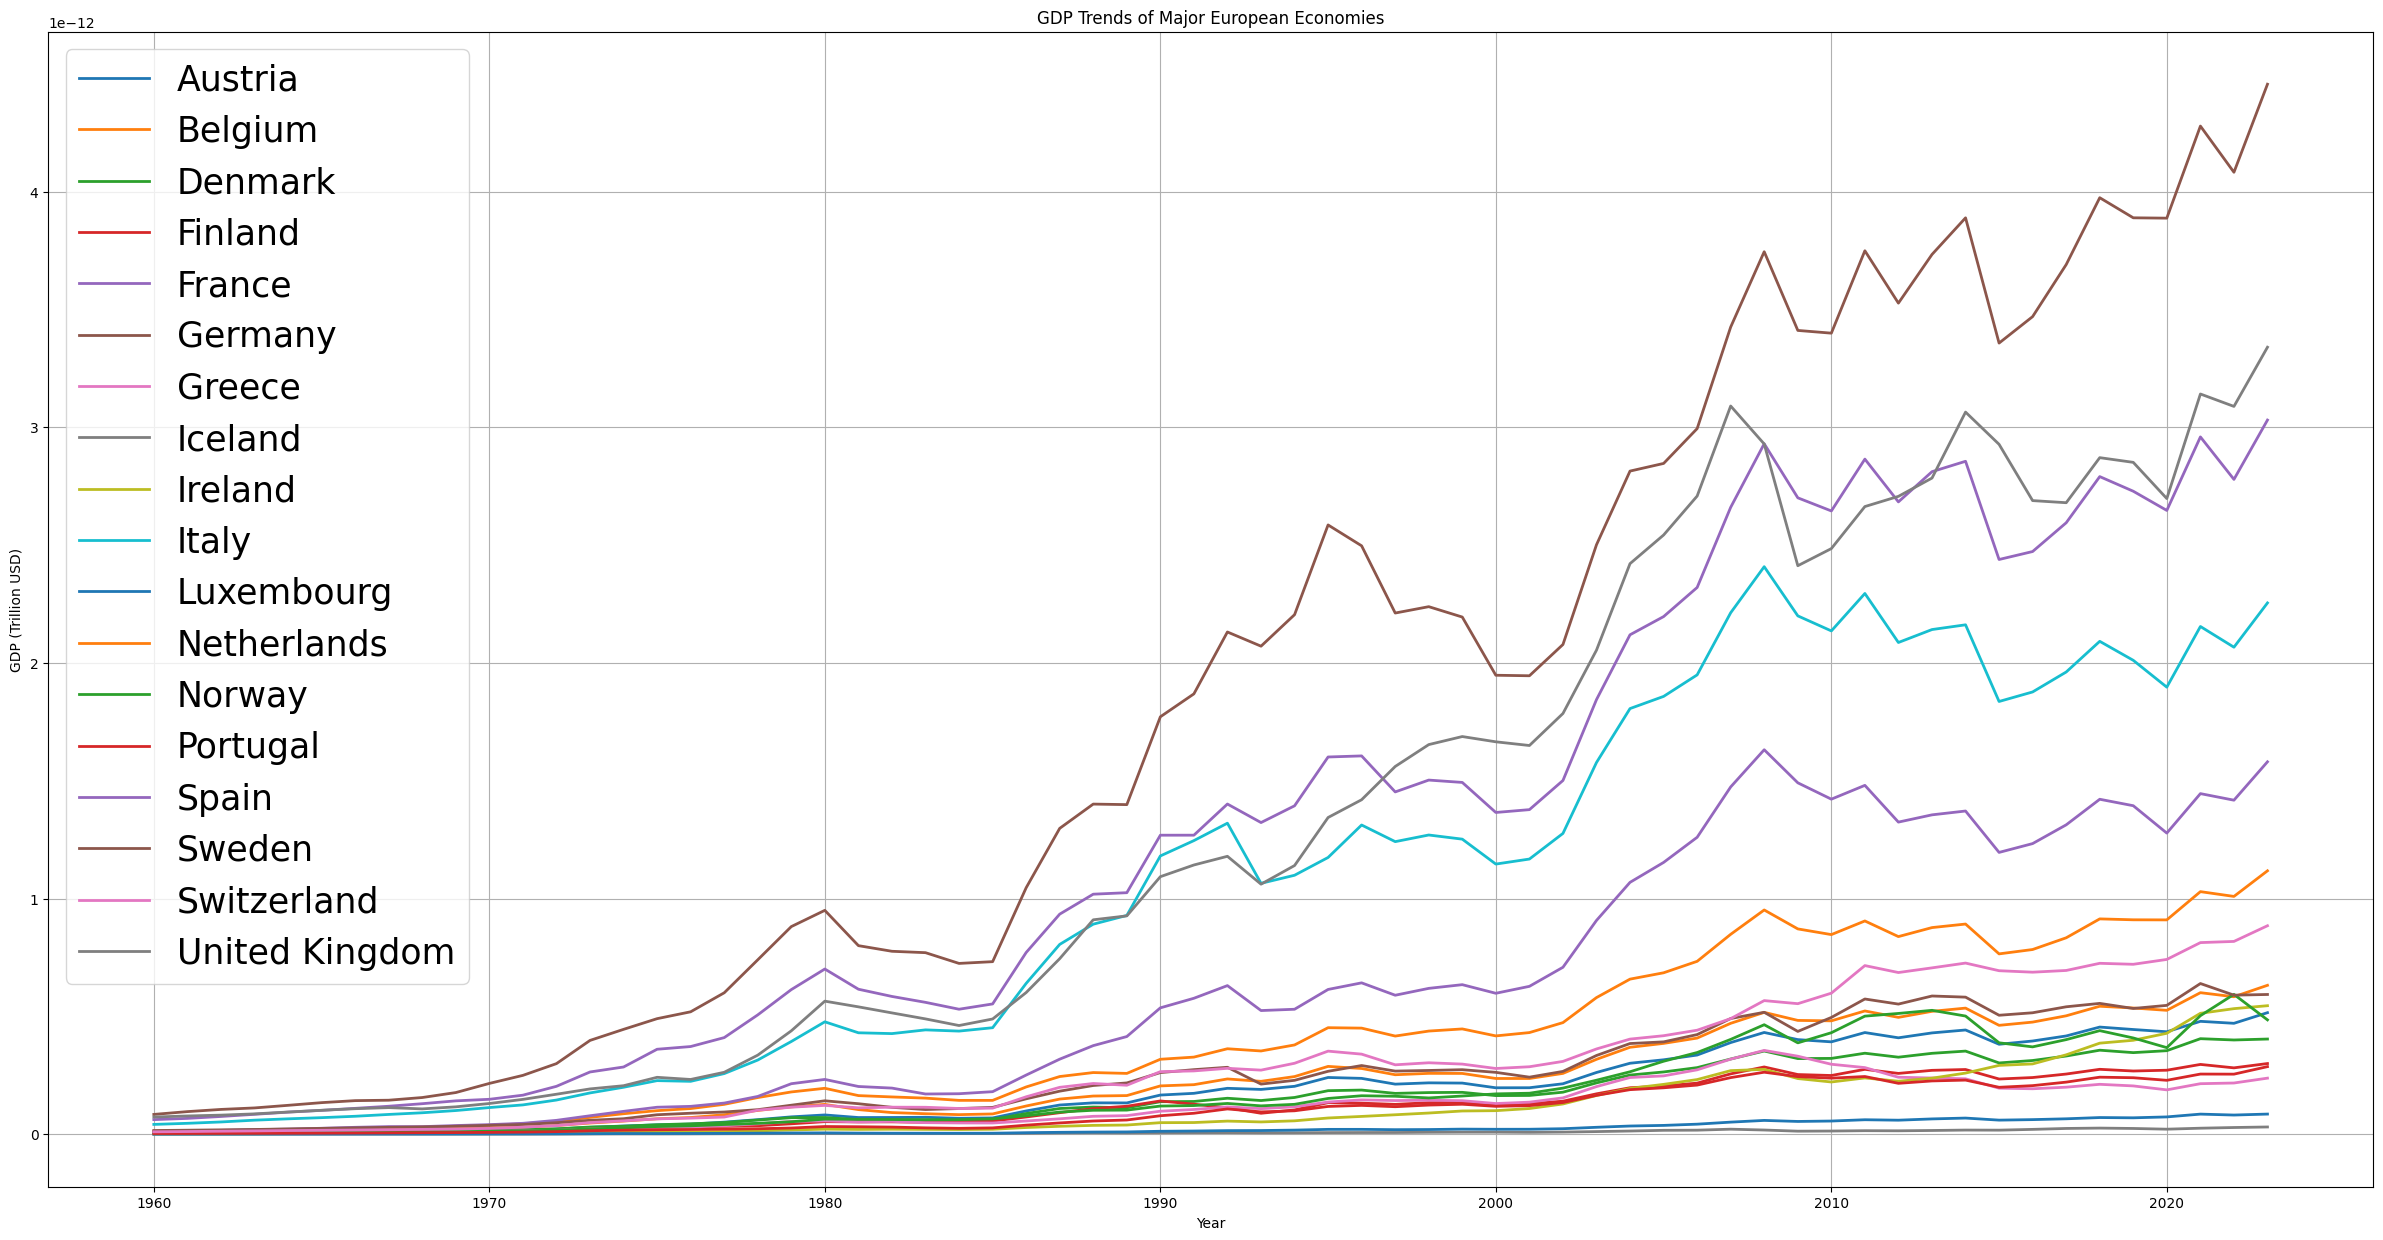

In [14]:
countries = df.columns[1:]  # Exclude 'Year' column
df[countries] = df[countries] / 1e12  # Scale to trillion USD

fig = plt.figure(figsize=(30, 15))

for country in countries:
    plt.plot(df['Year'], df[country], label=country, linewidth=2)

plt.title('GDP Trends of Major European Economies', fontsize=12)
plt.xlabel('Year')
plt.ylabel('GDP (Trillion USD)')
plt.legend(fontsize=25)
plt.grid(True)
plt.show()